# Dimensionality Reduction

**What is dimensionality reduction?**
- Dimensionality reduction is the process of creating smaller dimensional feature spaces

**Why do we care?**
- **Curse of dimensionality:** Roughly speaking, curse of dimensionality refers to the fact that machine learning classifiers become worse and worse, the more features we have. This is because, in this context, they suffer from a larger degree of overfitting, the more features we have. Thus, reducing the size of feature set can imporve the performance of certain types of algorithms. For example, K-nearest neighbors and decision trees are the algorithms, which are very prone to overfitting.

- **Computational Efficiency**: For example, KNN is very expensive if we have a large dataset and a lot of training examples. But It can be slow if, in each case, we have to compute a distance metric, for example, the Euclidean distance metric, which depends on the number of features in the dataset. Sometimes, It might be worthwhile to reduce the feature set to imporve the computational performance. However, our goal is always of course to reduce to the feature set such that we don't lose too much of the predictive performance
- **Easier data collection**: choose a subset of features that are easier and cheaper to collect , but give the same performance 
- **Storage space**: Choose important and necessary features to store
- **Interpretability**: For example, if you're buiding a machine learning model for a bank to detect credit frauds. When a credit card is denied the customer has the right to know "why". Thus, subset of features or feature selection can help with understanding and interpreting even complex machine learning algorithms.

**Dimensionality reduction includes 2 two main categories:**
1. Feature Selection
2. Feature Extraction

## I) Feature Selection
- Feature selection is the process that we choose the subset of features with a view to **improving the predictive or (and) computational performance**

**Content covered:**
1. Different categories of feature selection
2. Filter methods
3. Embedded methods
    - 3.1. L1-regularized logistic regression
    - 3.2. Random forest feature importance
4. Wrapper methods
    - 4.1. Recursive feature elimilation
    - 4.2. Permutation importance
    - 4.3 Sequential feature selection

### 1. Different categories of feature selection

#### 1.1. Filter methods: 
These filter methods are methods that are essentially focused on **intrinsic** properties of the features (focus on the features themselves)
   
**Filter methods**:
- **Information gain**
- **Correlation with the target** (bivariate statistics): In regression, if a feature is highly correlated to the target itself. Then this feature is a good bang for the buck when fitting the model
- **Pairwise correlation** (bivariate statistics): For example, if we have two features that are highly correlated. It doesn't tell us these features are useful or not. But if one feature is very highly correlated to the other fearures. We know at least one of the features is redundant. So we can remove one of them from the dataset without losing too much information 
- **Variance threshold** (univariate statistics): The larger the variance, the better. We can remove the features which have a low variance.


#### 1.2. Embedded methods: involve a model, embedded in learning algorithms
These embedded methods:
- involve a model
- are embedded in learning algorithms
- are a part of optimizing the objective function
   
**Embedded methods**:
- L1 (LASSO) regularization
- Decision tree



#### 1.3. Wrapper methods
Wrapper methods are closest to our main goal, which is to optimizing the predictive performance by fit the model on different featue subsets and then based on the performance of the model we select or elimilate the features.

**Wrapper methods**:
- Recursive Feature Elimilation (RFE)
- Sequential Feature Selection (SFS)
- Permutation importance

## 2. Filter methods

### 2.1. Variance Threshold (Filter)
- Compute the variance of each feature
- Assume that features with a high variance may contain more useful information

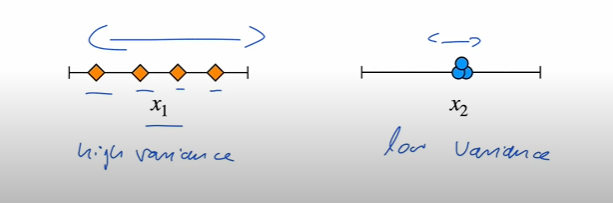

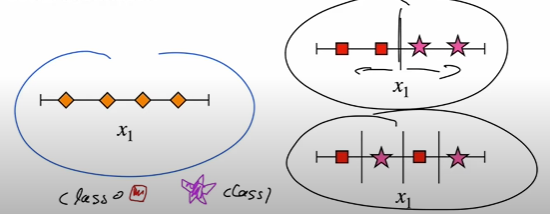

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = np.array([[1.], [2.], [3.], [4.]])
y = np.array([0, 1, 0, 1])

tree = DecisionTreeClassifier(max_depth=None, random_state=1)
tree.fit(X, y)
tree.score(X, y)

1.0

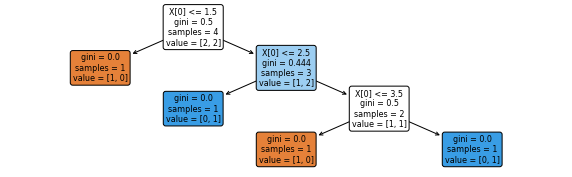

In [2]:
plt.figure(figsize=(10, 3))
plot_tree(tree, filled=True, rounded=True)
plt.show()

### Variance
Variance of discrete random variable:
$$Var(X) = \sum_{i=1}^n {pi.(x_i -  \mu)^2}$$

E.g., dataset with n datapoints (for sample variance, n-1 (Bessel's correction))
$$Var(X) = \frac{1}{n} \sum_{i=1}^n {pi.(x_i -  \mu)^2}$$

Variance of Bernoulli variable (Boolean features, e.g., after one-hot encoding)
$$Var(X) = p(1-p)$$ 
- Where p is the probability that is 1

In [3]:
from sklearn.preprocessing import OneHotEncoder
X = [['blue'], ['green'], ['blue'], ['blue'], ['green'], ['red'], ['blue'], ['green']]
y = [0, 0, 1, 0, 0, 1, 0, 0]
ohe = OneHotEncoder(drop='first')
X_ohe = ohe.fit_transform(X)
X_ohe.toarray()

array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [4]:
from sklearn.feature_selection import VarianceThreshold

vt_selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
                              
vt_selector.fit_transform(X_ohe).toarray()

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])

**Variance Threshold**
- Compute the variance of each feature
- Assume that features with a high variance may contain more useful information
- Select the subset of features based on a user-specified threshold ("keep if greater or equal  to x" or "keep the top k features with largest variance")
- <font color='green'>Good:</font> fast
- <font color='red'>Bad:</font> does not take the relationship among features into account

## 3. Embeded method

### 3.1. Random Forest Feature Importance 

**Method: Impurity-based feature importance (used in scikit-learn)**

**- Measured as follows:**
- for a given feature
    - for each tree
        - compute impurity decrease (Gini, Entropy)
        - weight by number of  examples at each node
        - average the impuruty decrease over all the trees

    - normalize importances so that sum of feature importances sum to 1

**- Caveats**
- Impurity-based feature importance is inflated for categorical features with lots of unique values
- Correlated features share importance

**- Code**

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_wine = pd.read_csv('data\\wine.csv')
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
X = df_wine.iloc[:, 1:]
y = df_wine['Class label']

In [8]:
forest = RandomForestClassifier(n_estimators=1000,
                                oob_score=True,
                                random_state=1,
                                n_jobs=-1)

forest.fit(X.values, y)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=1)

In [9]:
importances = forest.feature_importances_
importances

array([0.12826575, 0.03127195, 0.01314586, 0.02520774, 0.03384464,
       0.05252472, 0.15506957, 0.01087043, 0.02196756, 0.14584952,
       0.08317038, 0.12018997, 0.17862191])

In [10]:
sorted_indices = np.argsort(importances)
sorted_indices

array([ 7,  2,  8,  3,  1,  4,  5, 10, 11,  0,  9,  6, 12], dtype=int64)

In [11]:
feature_labels = X.columns
feature_labels

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

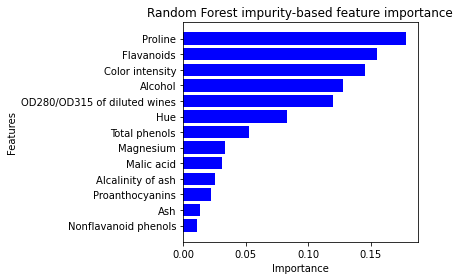

In [12]:
plt.barh(feature_labels[sorted_indices], importances[sorted_indices], color='blue')

plt.title('Random Forest impurity-based feature importance')
plt.xlabel('Importance')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

### 3.2. L1-regularized logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [14]:
# Using l2-regularized logistic regression
# inverse of regularization strength = 100 

logreg = LogisticRegression(solver='liblinear', penalty='l2', C=100)
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.9495238095238095

In [15]:
# Using l1-regularized logistic regression
# inverse of regularization strength = 100

logreg = LogisticRegression(solver='liblinear', penalty='l1', C=100) 
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.9663492063492063

- Note: **solver='liblinear'** supports for **both 'l1' and 'l2'**

## 4. Wrapper methods

### 4.1. Recursive Feature Elimilation
**Consider a (generalized) linear model (like linear or logistic regression):**
1. Fit the model to dataset
2. Elimilate feature with smallest coefficient ("most unimportant")
3. Repeat steps  1-2 until desired number of features is reached

**Recursive Feature Elimination Pros and Cons**
- (+) Can explicitly select number of features
- (+) Not super expensive (if linear model is used)
- (+) Takes feature interaction into account
- (-) Assumes linear separability (if linear model is used)
- (-) Does not optimize performance metric directly
- (-) Needs search method to find good number of features

**Code**

In [16]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

In [17]:
df_wine = pd.read_csv('data\\wine.csv')
df_wine.tail()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [18]:
X = df_wine.iloc[:, 1:]
y = df_wine['Class label']

In [19]:
logreg = LogisticRegression(solver='liblinear', 
                            penalty='l2', 
                            random_state=1)


rfe = RFE(estimator=logreg,
          n_features_to_select=7,
          step=1)


scaler = StandardScaler()

knn_clf = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)

pipe = make_pipeline(scaler, 
                     rfe, 
                     knn_clf)

In [20]:
print(f"Validation accuracy: {cross_val_score(pipe, X, y, cv=10, scoring='accuracy').mean() :.3f}")

Validation accuracy: 0.983


In [21]:
params = {}
params['rfe__n_features_to_select'] = range(1, 13)
params['kneighborsclassifier__n_neighbors'] = range(1, 13)
print(f'- Hyperparameters: \n{params}')

- Hyperparameters: 
{'rfe__n_features_to_select': range(1, 13), 'kneighborsclassifier__n_neighbors': range(1, 13)}


In [22]:
grid = GridSearchCV(pipe, params, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('rfe',
                                        RFE(estimator=LogisticRegression(random_state=1,
                                                                         solver='liblinear'),
                                            n_features_to_select=7)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_jobs=-1,
                                                             n_neighbors=10))]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': range(1, 13),
                         'rfe__n_features_to_select': range(1, 13)},
             scoring='accuracy')

In [23]:
print(f'- Best score: {grid.best_score_ :.3f}')
print(f'- Best parameters: {grid.best_params_}')

- Best score: 0.994
- Best parameters: {'kneighborsclassifier__n_neighbors': 7, 'rfe__n_features_to_select': 5}


### 4.2. Feature Permutation Importance


**Feature Permutation Importance**
- For each feature column:
    1. shuffle feature column
    2. observe performance and compare to the origial


- Permutation importance often **gives similar results** as random forest impurity-based importance. It is model agnostic (model agnostic: not restricted by a model)


- Permutation importance is not strictly feature selection, but it tells us which features a model relies on the most
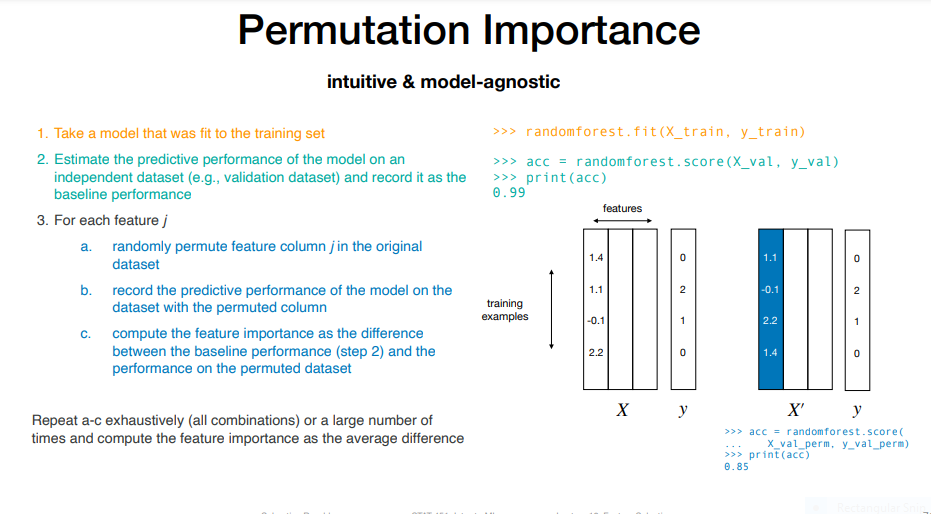

**Column-Drop Variant:**
- For each feature column j:
    - temporarily remove column
    - fit model to reduced dataset
    - compute  validation set performance  and compare to the baseline performance
    
    
**Permutation Importance Pros and Cons**
- More accurate but more expensive (not for a particular model, will adopt something similar for SFS)

- (+) Model agnostic
- (+) Based on metric of choice
- (+) Easy to understand
- (+/-) Feature importance is for that particular model (feature might be more/less
 important to another model)
- (+) Unlike impurity-based random forest importance, it does not suffer from
 "overfitting" since an independent dataset is used
- (-) Like in impurity-based random forest importance, the importance is undervalued
 if two features are highly correlated


**Code**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [25]:
df_wine = pd.read_csv('data\\wine.csv')
df_wine.tail()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [26]:
X = df_wine.iloc[:, 1:]
y = df_wine['Class label']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=1)

In [27]:
forest = RandomForestClassifier(n_estimators=1000,
                                random_state=1,
                                n_jobs=-1)

cross_val_score(forest, X, y, cv=10, scoring='accuracy', n_jobs=-1).mean()

0.9777777777777779

In [28]:
forest.fit(X_train, y_train)
result = permutation_importance(estimator=forest, 
                                X=X_test, y=y_test, 
                                scoring='accuracy', 
                                n_repeats=60,
                                random_state=1,
                                n_jobs=-1)

In [29]:
result.importances_mean

array([0.03240741, 0.        , 0.        , 0.        , 0.00277778,
       0.00432099, 0.05246914, 0.        , 0.        , 0.05864198,
       0.        , 0.00432099, 0.06604938])

In [30]:
sorted_indices = np.argsort(result['importances_mean'])[::-1]
feature_labels = X.columns

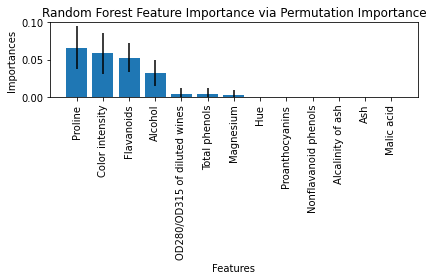

In [31]:
plt.bar(
    range(X_train.shape[1]), 
    result['importances_mean'][sorted_indices],
    yerr=result['importances_std'][sorted_indices]
)

plt.title('Random Forest Feature Importance via Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Importances')

plt.xticks(
    ticks=range(X_train.shape[1]), 
    labels=feature_labels[sorted_indices],
    rotation=90
)

plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.1])


plt.tight_layout()
plt.show()

**Random Feature as Control**

In [32]:
X = df_wine.iloc[:, 1:]
y = df_wine['Class label']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=1)

In [33]:
# create 2 arrays containing random values
np.random.seed(123)
x1 = np.random.randn(X_train.shape[0])
x2 = np.random.randn(X_test.shape[0])

# create 2 features having the randomness
X_train['random'] = x1
X_test['random'] = x2

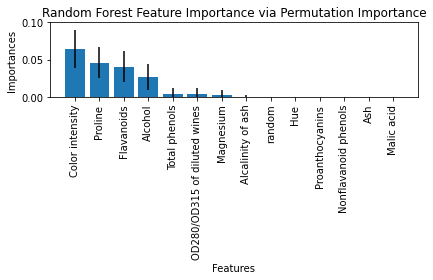

In [34]:
forest = RandomForestClassifier(n_estimators=1000,
                                random_state=1,
                                n_jobs=-1)

forest.fit(X_train, y_train)

result = permutation_importance(estimator=forest, 
                                X=X_test, y=y_test, 
                                scoring='accuracy', 
                                n_repeats=50,
                                random_state=1,
                                n_jobs=-1)

sorted_indices = np.argsort(result['importances_mean'])[::-1]
feature_labels = X_train.columns



plt.bar(
    range(X_train.shape[1]), 
    result['importances_mean'][sorted_indices],
    yerr=result['importances_std'][sorted_indices]
)

plt.title('Random Forest Feature Importance via Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Importances')

plt.xticks(
    ticks=range(X_train.shape[1]), 
    labels=feature_labels[sorted_indices],
    rotation=90
)

plt.xlim([-1, X_train.shape[1]])
plt.ylim([0, 0.1])


plt.tight_layout()
plt.show()

### 4.3. Sequential Feature Selection
**Which feature selection method would guarantee optimal model performance?**
- Answer: trying all posible feature combinations --> **exhaustive** feature selection
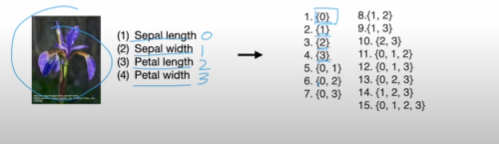

Combinations! $$\sum_{i=1}^{m} (^m_i) = (^4_1) + (^4_2) + (^4_3) + (^4_4) = 15$$

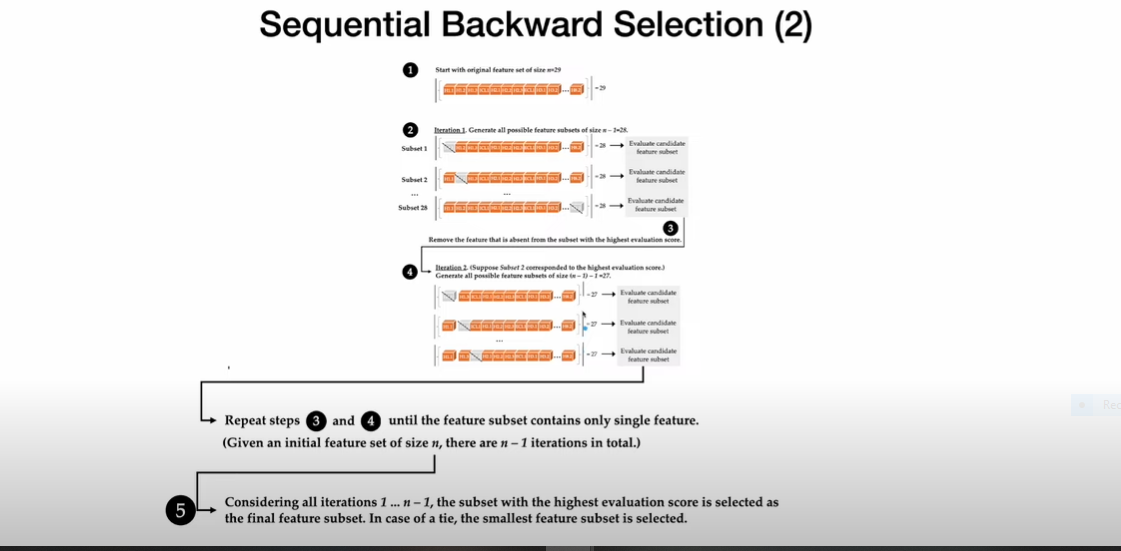

**Code**

In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score 

In [36]:
df_wine = pd.read_csv('data\\wine.csv')
df_wine.tail()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [37]:
X = df_wine.iloc[:, 1:]
y = df_wine['Class label']

**Sequential Forward Selection**

In [38]:
logreg = LogisticRegression(solver='liblinear')

sfs_forward = SequentialFeatureSelector(estimator=logreg, 
                                        n_features_to_select=10, 
                                        direction='forward',  
                                        cv=5, 
                                        scoring='accuracy',
                                        n_jobs=-1)

scaler = StandardScaler()

pipe_1 = make_pipeline(scaler, sfs_forward, logreg)

**Sequential Backward Selection**

In [39]:
logreg = LogisticRegression(solver='liblinear')

sfs_backward = SequentialFeatureSelector(estimator=logreg, 
                                         n_features_to_select=10, 
                                         direction='backward',  
                                         cv=5, 
                                         scoring='accuracy',
                                         n_jobs=-1)

pipe_2 = make_pipeline(scaler, sfs_backward, logreg)

In [40]:
# no feature selection
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.961111111111111

In [41]:
# with sequential forward selection
cross_val_score(pipe_1, X, y, cv=5, scoring='accuracy').mean()

0.9777777777777779

In [42]:
# with sequential backward selection
cross_val_score(pipe_2, X, y, cv=5, scoring='accuracy').mean()

0.9888888888888889

- In this case, sequential backward selection is slightly better than sequential forward selection

**Exhaustive Feature Selection**
- Always take the number of combinations into account to see whether it's feasible to use or not!

In [43]:
from math import comb

total_features = X.shape[1]

all_combinations = 0
for num_feature in range(1, total_features+1):
    all_combinations += comb(total_features, num_feature)
    
print(f'The number of combinations in the wine dataset: {all_combinations}')

The number of combinations in the wine dataset: 8191


In [44]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

logreg = LogisticRegression(solver='liblinear', random_state=1)

efs = ExhaustiveFeatureSelector(estimator=logreg , 
                                min_features=1, 
                                max_features=13, 
                                cv=5,
                                scoring='accuracy',
                                print_progress=True,
                                n_jobs=-1)

efs.fit(X, y)

Features: 8191/8191

ExhaustiveFeatureSelector(estimator=LogisticRegression(random_state=1,
                                                       solver='liblinear'),
                          max_features=13, n_jobs=-1)

In [45]:
# get best feature indices
efs.best_idx_

(0, 1, 2, 3, 6, 9, 12)

In [46]:
# get best feature names
efs.best_feature_names_

('Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Flavanoids',
 'Color intensity',
 'Proline')

In [47]:
# covert tuple of features into list of features
best_features = list(efs.best_feature_names_)
best_features

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Flavanoids',
 'Color intensity',
 'Proline']

In [48]:
X_best = df_wine[best_features]
cross_val_score(logreg, X_best, y, cv=5, scoring='accuracy', n_jobs=-1).mean()

0.9666666666666666